In [27]:
import os
def make_dir_label_dataframe(path,keyword):

    class_folders = os.listdir(path)
    image_paths = []
    labels = []

    for class_folder in class_folders:
        for key in keyword:
            if key in class_folder:
                class_path = os.path.join(path, class_folder)
                image_files = os.listdir(class_path)
                for image_file in image_files:
                    image_path = os.path.join(class_path, image_file)
                    image_paths.append(image_path)
                    labels.append(class_folder)
    return  image_paths,labels
                    
    

In [28]:

path =r"C:\Users\zbook 17 g3\Desktop\New folder (2)\chest_xray\train"
keyword=["PNEUMONIA","NORMAL"]
image1,label1=make_dir_label_dataframe(path,keyword)

In [30]:
import pandas as pd
df = pd.DataFrame({'image_path': image1, 'label': label1})
df.head(10)

,image_path,label
0,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,NORMAL
1,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,NORMAL
2,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,NORMAL
3,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,NORMAL
4,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,NORMAL
5,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,NORMAL
6,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,NORMAL
7,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,NORMAL
8,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,NORMAL
9,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,NORMAL


In [137]:
df.tail(10)

,image_path,label
5206,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,PNEUMONIA
5207,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,PNEUMONIA
5208,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,PNEUMONIA
5209,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,PNEUMONIA
5210,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,PNEUMONIA
5211,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,PNEUMONIA
5212,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,PNEUMONIA
5213,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,PNEUMONIA
5214,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,PNEUMONIA
5215,C:\Users\zbook 17 g3\Desktop\New folder (2)\ch...,PNEUMONIA


In [31]:
print(len(df["label"]))

5216


In [36]:
len(df["label"])==len(df["image_path"])

True

In [37]:
classes_num=len(df["label"].unique())
classes_num

2

In [12]:
classes=df["label"].unique()
classes

array(['NORMAL', 'PNEUMONIA'], dtype=object)

Visulization

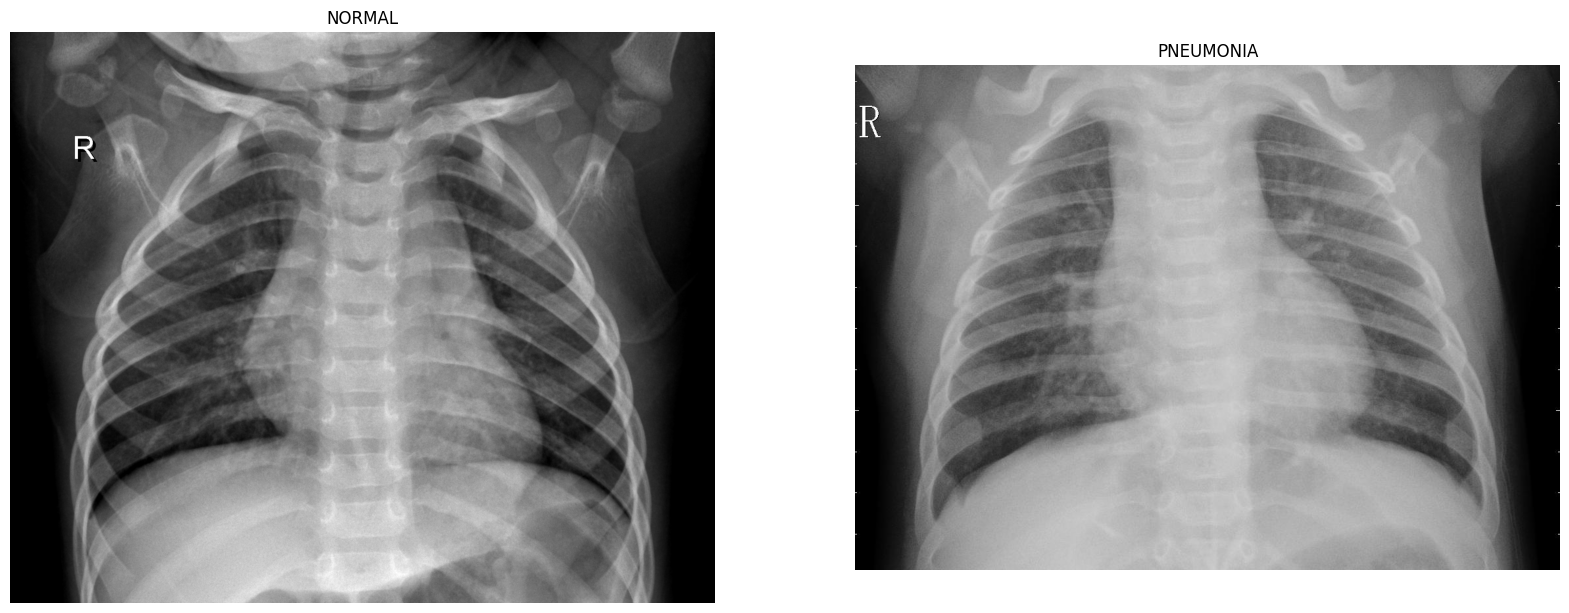

In [38]:
import cv2
import matplotlib.pyplot as plt

def Disply():
    plt.figure(figsize=(20,20))
    for i, class_name in enumerate(classes):
        plt.subplot(1, 2, i + 1)

        img_RGB= cv2.imread(df[df['label']==class_name]['image_path'].iloc[1])
        if img_RGB is not None:
            plt.imshow(cv2.cvtColor(img_RGB, cv2.COLOR_BGR2RGB))
            plt.title(class_name)
            plt.axis('off')


plt.show()

Disply()

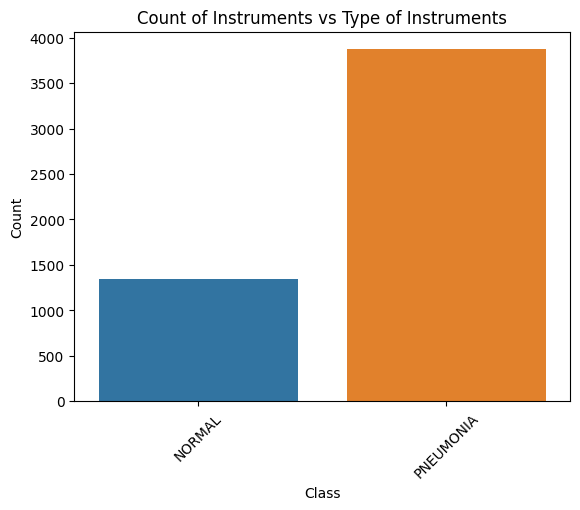

In [39]:
import seaborn as sns

sns.countplot(x='label', data=df)
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of Instruments vs Type of Instruments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()


In [45]:
class_counts = df['label'].value_counts()
print(class_counts)


PNEUMONIA    3875
NORMAL       1341
Name: label, dtype: int64


Preprocessing

In [60]:

import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (150, 150))/255
        
        images.append(img)
    return np.array(images)

X = load_images(df['image_path'].values)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)



X_train shape: (4172, 150, 150)
y_train shape: (4172,)
X_val shape: (1044, 150, 150)
y_val shape: (1044,)


In [17]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [62]:
X_train = X_train.reshape((-1, 150, 150, 1))
X_val = X_val.reshape((-1, 150, 150, 1))
X_train.shape

(4172, 150, 150, 1)

In [63]:
from keras.preprocessing.image import ImageDataGenerator

data_aug=ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range = 45, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip = True,  
        vertical_flip=False)  
data_aug.fit(X_train)

In [64]:
X_train .shape

(4172, 150, 150, 1)

Model Creation

In [106]:
from keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Dropout
model = tf.keras.Sequential([
                             InputLayer(input_shape = (150, 150, 1)),

                             Conv2D(filters = 32, kernel_size = 3, strides=1, padding='valid', activation = 'relu'),
                             BatchNormalization(),
                             MaxPool2D (pool_size = 2, strides= 2),

                             Conv2D(filters = 64, kernel_size = 3, strides=1, padding='valid', activation = 'relu'),
                             BatchNormalization(),
                             MaxPool2D (pool_size = 2, strides= 2),
                            Conv2D(filters = 64, kernel_size = 3, strides=1, padding='valid', activation = 'relu'),
                            BatchNormalization(),
                            Conv2D(filters = 128, kernel_size = 3, strides=1, padding='valid', activation = 'relu'),
                            BatchNormalization(),
                            MaxPool2D (pool_size = 2, strides= 2),
                            
                            Flatten(),
                            Dense(100,activation="relu"),
                            Dropout(.3),
                            Dense(60,activation="relu"),
                            Dropout(.4),
                            Dense(10,activation="relu"),
                            Dense(1,activation="sigmoid")
                            
                            
                            
                             

])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 batch_normalization_57 (Ba  (None, 148, 148, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_66 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_58 (Ba  (None, 72, 72, 64)        256       
 tchNormalization)                                               
                                                      

In [109]:
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])


In [112]:
history = model.fit(data_aug.flow(X_train,y_train, batch_size = 32) ,epochs = 20 , validation_data = data_aug.flow(X_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/20
131/131 [==============================] - 203s 2s/step - loss: 0.5469 - accuracy: 0.7548 - val_loss: 14.1676 - val_accuracy: 0.7251 - lr: 0.0010
Epoch 2/20
131/131 [==============================] - 184s 1s/step - loss: 0.4353 - accuracy: 0.8027 - val_loss: 15.0748 - val_accuracy: 0.7251 - lr: 0.0010
Epoch 3/20
131/131 [==============================] - ETA: 0s - loss: 0.4211 - accuracy: 0.8344
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
131/131 [==============================] - 181s 1s/step - loss: 0.4211 - accuracy: 0.8344 - val_loss: 20.3101 - val_accuracy: 0.7251 - lr: 0.0010
Epoch 4/20
131/131 [==============================] - 178s 1s/step - loss: 0.3550 - accuracy: 0.8624 - val_loss: 0.5621 - val_accuracy: 0.8228 - lr: 3.0000e-04
Epoch 5/20
131/131 [==============================] - 180s 1s/step - loss: 0.3315 - accuracy: 0.8802 - val_loss: 0.7209 - val_accuracy: 0.2979 - lr: 3.0000e-04
Epoch 6/20
131/131 [============================

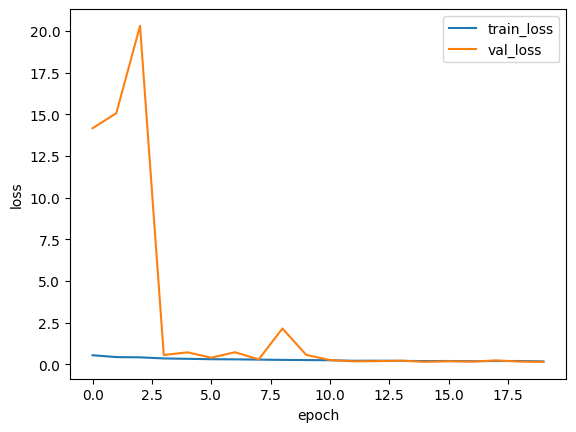

In [119]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
#plt.axis("off")
plt.show()

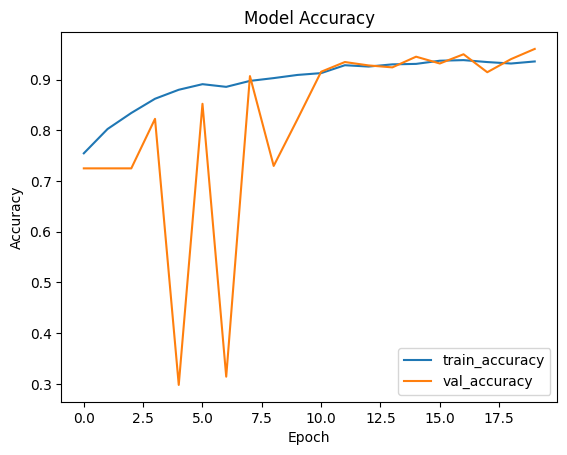

In [121]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

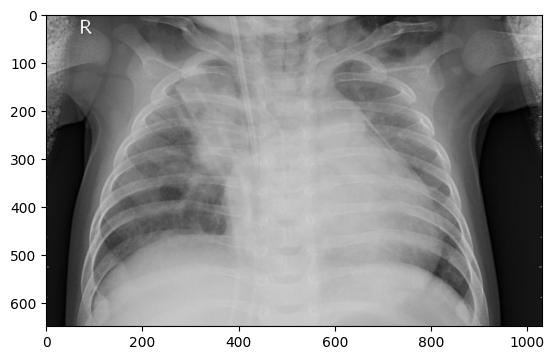

In [132]:
test_img=cv2.imread(r"C:\Users\zbook 17 g3\Desktop\New folder (2)\chest_xray\test\PNEUMONIA\person127_bacteria_603.jpeg")
plt.imshow(test_img)

In [136]:
import cv2
import numpy as np
    
test_image_path = r"C:\Users\zbook 17 g3\Desktop\New folder (2)\chest_xray\test\PNEUMONIA\person127_bacteria_603.jpeg"
test_img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
resized_test_img = cv2.resize(test_img, (150, 150))
normalized_test_img = resized_test_img / 255.0  

input_test_img = normalized_test_img.reshape((1, 150, 150, 1))

prediction = model.predict(input_test_img)

predicted_class = "PNEUMONIA" if prediction[0][0] > 0.5 else "NORMAL"

print("Predicted class:",prediction, predicted_class)


1/1 [==============================] - 0s 64ms/step
Predicted class: [[0.9976627]] PNEUMONIA
